<a href="https://colab.research.google.com/github/ShivaniLad/My-Work/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Churn Modelling Problem
  - This a problem-solving data analytics challenge for a bank.
  - Here, we have a dataset, with a large sample of the bank's customers.
  - To make this dataset, the bank gathered information such as customer id, credit score, gender, age, tenure, balance, if the customer is active, has a credit card, etc. 
  - During 6 months, the bank observed if these customers left or stayed in the bank.
  <br><br>
  - **Goal :** 
    - To make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any individual customer will leave the bank or stay (customer churn). 
    - Besides that, we have to rank all the customers of the bank, based on their probability of leaving. 
    - To do that, we need to use the right Deep Learning model, one that is based on a probabilistic approach.

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Importing the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1Rivet/Data/Churn_Modelling.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Data Analysis**

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

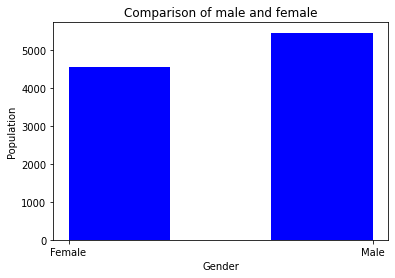

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'blue')
plt.title('Comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

In [ ]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

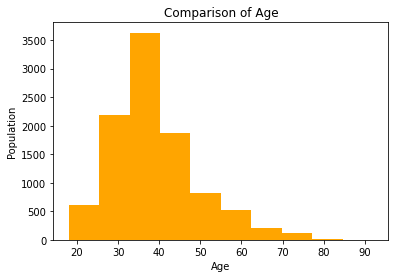

In [ ]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('Comparison of Age')
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

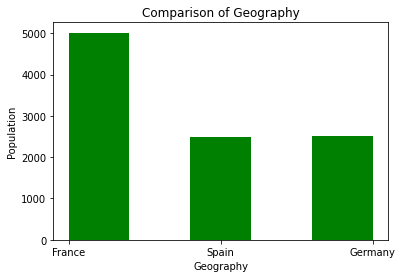

In [ ]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('Comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('Population')
plt.show()

In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

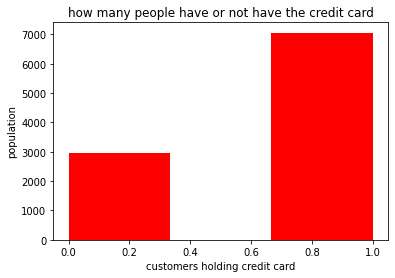

In [ ]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

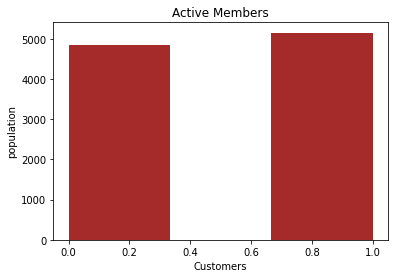

In [ ]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

Geography  France  Germany  Spain
Gender                           
Female       2261     1193   1089
Male         2753     1316   1388


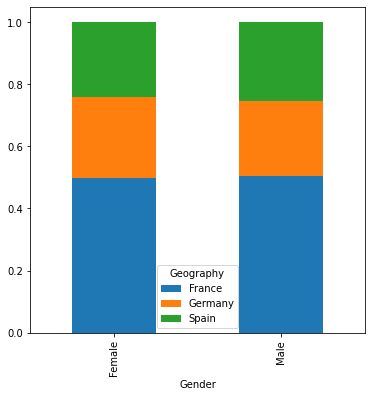

In [ ]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
print(Gender)

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))
#Pandas dataframe.div() is used to find the floating division of the dataframe and other element-wise. 
#This function is similar to dataframe/other, but with an additional support to handle missing value in one of the input data.
#Pandas DataFrame.sum() function is used to return the sum of the values for the requested axis by the user. Here, 1 is used for adding column values.
#summing astype(float) for decimal output.

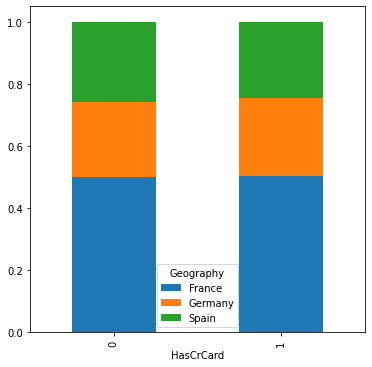

In [ ]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))



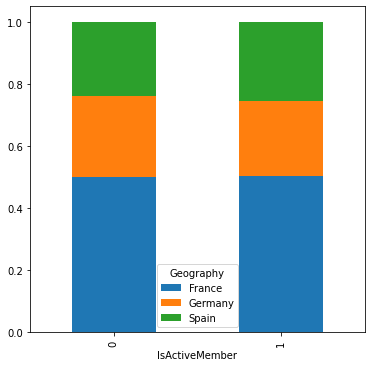

In [ ]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

Geography  France  Germany  Spain
Age                              
18             11        6      5
19             11        8      8
20             21        6     13
21             31       11     11
22             45       11     28
..            ...      ...    ...
83              0        1      0
84              1        1      0
85              1        0      0
88              0        0      1
92              2        0      0

[70 rows x 3 columns]


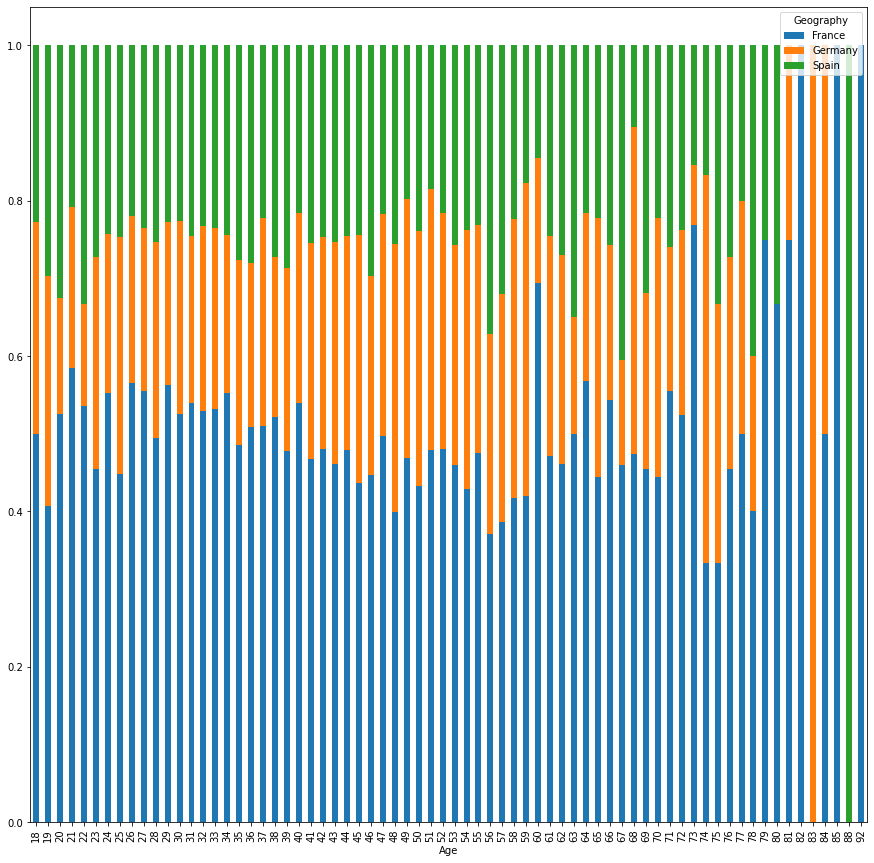

In [ ]:
# comparing ages in different geographies

Age = pd.crosstab(data['Age'], data['Geography'])
print(Age)
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [ ]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)


Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


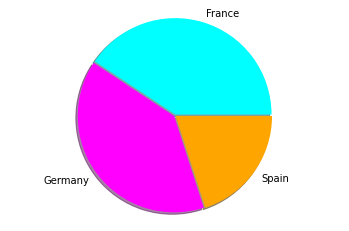

In [ ]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)
#Maybe you want one of the wedges to stand out? The explode parameter allows you to do that.
plt.axis('equal')
plt.show()

**Data Preprocessing**

In [ ]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
data.shape

(10000, 11)

In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.drop(['Exited'], axis=1)
y = data['Exited']

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
# Encoding Categorical variables into numerical variables.
# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
x.shape

(10000, 13)

In [ ]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [ ]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743


**Modelling**

**Aritificial Neural Networks**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu', input_dim = 13))

# second hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu'))

# third hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu'))

# fourth hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu'))

# fifth hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu'))

# output layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

#Keras Adam Optimizer (Adaptive Moment Estimation) The adam optimizer uses adam algorithm in which the stochastic gradient descent method is 
#leveraged for performing the optimization process. It is efficient to use and consumes very little memory. 
#It is appropriate in cases where huge amount of data and parameters are available for usage.

model.fit(x_train, y_train, batch_size = 10, epochs = 50)


Epoch 1/50
750/750 [==============================] - 2s 1ms/step - loss: 0.6149 - accuracy: 0.7963
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7963
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.7963
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5071 - accuracy: 0.7963
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7963
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 8/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 9/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 10/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963

In [ ]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dropout(0.6))

# second hidden layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.6))

# output layer
model.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, epochs = 50)



Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6172 - accuracy: 0.7963
Epoch 2/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7963
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5134 - accuracy: 0.7963
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7963
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5058 - accuracy: 0.7963
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 8/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 9/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7963
Epoch 10/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.7963

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(6, kernel_initializer= 'uniform', activation = 'relu', input_dim = 13))

# output layer
model.add(Dense(6, kernel_initializer= 'uniform', activation = 'relu'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, epochs = 50)



Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5386 - accuracy: 0.1269
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.0448
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4103 - accuracy: 0.1160
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.1389
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.1265
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.2083
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.2280
Epoch 8/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3775 - accuracy: 0.0739
Epoch 9/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.1131
Epoch 10/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.1653

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(8, kernel_initializer= 'uniform', activation = 'relu', input_dim = 13))

# second hidden layer
model.add(Dense(8, kernel_initializer= 'uniform', activation = 'relu'))

# output layer
model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, epochs = 50)



Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.7963
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.7963
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.7968
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8169
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4188 - accuracy: 0.8209
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4168 - accuracy: 0.8268
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8288
Epoch 8/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8319
Epoch 9/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8327
Epoch 10/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8332

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

[[ True  True  True  True  True  True]]


In [ ]:
print("Accuracies :", accuracies)

print("Mean Accuracy :", accuracies.mean())
print("Variance :", accuracies.std())

Accuracies : [0.84533334 0.84666669 0.87199998 0.83866668 0.85066664 0.84799999
 0.82533336 0.86799997 0.81733334 0.83733332]
Mean Accuracy : 0.8449333310127258
Variance : 0.015978306110932747
